### LAB 1 - HOMEWORK - GROUP D - APPLIED MACROECONOMICS
**Team Member**:
1. Amir Adilkhan
2. Tseeltuul Erdenebat
3. Tram Anh Hoang
4. Kostiantyn Okhrimenko
5. John Dalton Julio Fils Sinord


### PART A: PLOTS
**Requirement**:
- Plot the histogram of average growth rates between 1980 and 2010. 
- Differentiate between developed, catching-up, and lagging behind countries.
- Make sure the plot title, axis titles, and legend reflect the correct information.

#### Data Preparation

In [2]:
import os

In [3]:
# Import numerical computations library
import numpy as np

# Import dataframe management library
import pandas as pd

# Import statistics library
import statsmodels.api as sm

# Import statistics library, allows R-like regression syntax
import statsmodels.formula.api as smf

# Import plotting library
import matplotlib.pyplot as plt

In [4]:
# Restore old behavior of rounding default axis ranges
import matplotlib as mpl

mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

In [5]:
# Read dataset
pwt = pd.read_stata('data/pwt100.dta')

In [6]:
# Observations for given year, show first 5
pwt[pwt['year']==1980].head(5)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
30,ABW,Aruba,Aruban Guilder,1980,955.632141,1097.319336,0.060096,NaN,NaN,NaN,...,0.708870,-0.523287,-0.036140,0.413531,0.220955,0.401716,0.376193,0.470558,0.243290,NaN
100,AGO,Angola,Kwanza,1980,30380.066406,28927.419922,8.341289,4.952234,NaN,1.041064,...,0.199817,-0.110904,-0.053434,0.266277,0.144358,0.305557,0.305243,0.352427,0.141561,0.935035
170,AIA,Anguilla,East Caribbean Dollar,1980,90.260712,98.726196,0.007285,0.001711,NaN,NaN,...,0.382009,-0.537341,0.073710,0.184369,0.086249,0.187307,0.159123,0.126158,0.081695,NaN
240,ALB,Albania,Lek,1980,9974.774414,9964.961914,2.682690,1.027045,NaN,1.881057,...,0.083631,-0.062801,-0.049042,0.190171,0.485072,0.141942,0.309622,0.327539,0.240337,NaN
310,ARE,United Arab Emirates,UAE Dirham,1980,248221.703125,307906.187500,1.019509,0.553300,NaN,1.617453,...,0.010779,-0.073821,0.569294,0.237618,0.127091,0.332890,0.308435,0.339780,0.154652,NaN


In [7]:
# Observations for given year, show first 5
pwt[pwt['year']==2010].head(5)

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
60,ABW,Aruba,Aruban Guilder,2010,4012.711670,3933.467773,0.101669,0.046500,NaN,NaN,...,0.705986,-0.918676,6.078640e-03,0.732815,0.452776,0.643131,0.639149,0.589527,0.346565,0.340283
130,AGO,Angola,Kwanza,2010,140742.281250,159625.234375,23.356246,11.977833,NaN,1.417133,...,0.648454,-0.170013,-2.239611e-01,0.677508,0.497219,0.636309,0.509237,0.612004,0.334951,0.424363
200,AIA,Anguilla,East Caribbean Dollar,2010,408.891510,381.682800,0.013438,NaN,NaN,NaN,...,0.557616,-1.056281,-2.123148e-16,0.741067,0.485195,0.600048,0.682445,0.527267,0.354686,NaN
270,ALB,Albania,Lek,2010,29490.845703,31021.064453,2.948023,0.890818,NaN,2.904078,...,0.085711,-0.292642,6.020573e-02,0.453864,0.434250,0.203403,0.585903,0.509596,0.329034,NaN
340,ARE,United Arab Emirates,UAE Dirham,2010,565722.187500,618895.250000,8.549988,5.272982,NaN,2.717433,...,0.595149,-0.506905,1.474093e-01,0.559105,0.409519,0.645025,0.557755,0.598626,0.338136,NaN


In [8]:
# Modify the dataset so that it is easier to work with

# Store country names and codes for later use
countries = pwt['country']
countries = countries.drop_duplicates()

countrycodes = pwt['countrycode']
countrycodes = countrycodes.drop_duplicates()

# Set MultiIndex (Index becomes country&year couple)
pwt.set_index(['country', 'year'], inplace=True)
pwt.tail(5)

countrycode currency_unit         rgdpe         rgdpo  \
country  year                                                         
Zimbabwe 2015         ZWE     US Dollar  40141.617188  39798.644531   
         2016         ZWE     US Dollar  41875.203125  40963.191406   
         2017         ZWE     US Dollar  44672.175781  44316.742188   
         2018         ZWE     US Dollar  44325.109375  43420.898438   
         2019         ZWE     US Dollar  42296.062500  40826.570312   

                     pop       emp  avh        hc          ccon           cda  \
country  year                                                                   
Zimbabwe 2015  13.814629  6.393752  NaN  2.584653  44249.355469  47325.460938   
         2016  14.030331  6.504374  NaN  2.616257  43291.566406  46404.160156   
         2017  14.236595  6.611773  NaN  2.648248  46113.945312  49457.570312   
         2018  14.438802  6.714952  NaN  2.680630  46198.441406  49665.386719   
         2019  14.645468  6.831017  NaN  2.713408  43961.839844  47128.785156   

               ...     csh_x     csh_m     csh_r      pl_c      pl_i  \
country  year  ...                                                     
Zimbabwe 2015  ...  0.140172 -0.287693 -0.051930  0.479228  0.651287   
         2016  ...  0.131920 -0.251232 -0.016258  0.470640  0.651027   
         2017  ...  0.126722 -0.202827 -0.039897  0.473560  0.639560   
         2018  ...  0.144485 -0.263658 -0.020791  0.543757  0.655473   
         2019  ...  0.213562 -0.270959 -0.089798  0.494755  0.652439   

                   pl_g      pl_x      pl_m      pl_n      pl_k  
country  year                                                    
Zimbabwe 2015  0.541446  0.616689  0.533235  0.422764  1.533909  
         2016  0.539631  0.619789  0.519718  0.416510  1.491724  
         2017  0.519956  0.619739  0.552042  0.415592  1.514525  
         2018  0.529867  0.641361  0.561526  0.425143  1.590120  
         2019  0.500927  0.487763  0.430082  0.420675  1.384068  

[5 rows x 50 columns]

#### Plot

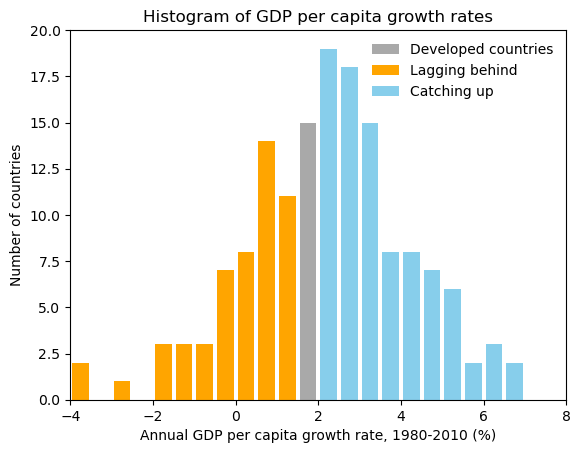

In [78]:
# Plot the histogram of average growth rates

x_80 = pwt.xs(1980, level='year')['rgdpe']/pwt.xs(1980, level='year')['pop']

x_10 = pwt.xs(2010, level='year')['rgdpe']/pwt.xs(2010, level='year')['pop']

# CAGR: Growth per year formula growth=(Value end/Value begin)^(1/t)-1
g = 100*((x_10/x_80)**(1/(2010-1980))-1)

plt.hist(g.dropna(), bins=np.arange(1.5, 2.5, 0.5), histtype='bar', rwidth=0.8, color='darkgrey', label='Developed countries')
plt.hist(g.dropna(), bins=np.arange(-10, 2, 0.5), histtype='bar', rwidth=0.8, color='orange', label='Lagging behind')
plt.hist(g.dropna(), bins=np.arange(2, 10, 0.5), histtype='bar', rwidth=0.8, color='skyblue', label='Catching up')

plt.xlim(-4, 8)

plt.title('Histogram of GDP per capita growth rates')
plt.xlabel('Annual GDP per capita growth rate, 1980-2010 (%)')
plt.ylabel('Number of countries')

plt.legend(frameon=False)

plt.show()

### PART B: SOLOW MODEL

**Task 1**: Assume the following parameters for the country ABC:

\begin{align}
A = 1 \\
α = 1/3 \\
δ = 0.4 \\
n = 0.05 \\
s = 0.5 \\
\end{align}

Calculate the steady-state value of the capital per worker (only up to 4 decimal points). Assume that initial capital per worker is 0.25. Draw a plot by putting time (period) on x-axis and capital per worker on y-axis. Set maximum period to 50. Show the initial level of capital per worker, transition period, and steady-state level of capital per worker clearly.

**Important**: The following tasks are independent of each other!

**Task 2**: Assume now that country ABC is at steady-state and we are in period 30. After 10 years being at steady-state, suddenly people become more prudent and saving rate increased from 0.5 to 0.6 permanently in country ABC. Calculate the new steady-state level of capital per worker in the country ABC (only up to 4 decimal points). On the same plot you drew in Task 1, et maximum period to 100 and show the new steady-state level of capital per worker? Did it increase or decrease? Why? What is the economic intuition behind the change in steady-state level of capital per worker after an increase in saving rate?

**Task 3**: Assume now that country ABC is at initial steady-state you calculated in Task 1. After 10 years reaching steady-state, the war happens and country ABC loses 40% of its capital per worker. However, all parameter values are same as in Task 1 (saving rate is 0.5). Calculate the new steady-state level of capital per worker in the country ABC. On the same plot you drew in Task 1, set maximum period to 100 and show the new steady-state level of capital per worker? Did it increase or decrease or not change? Why or why not? Show the initial level of capital per worker, transition period, and steady-state level of capital per worker clearly.

Hint: you may want to benefit from the codes in the section after homeworks: Optional - Analysis of Saving Rate.

#### TASK 1

The steady-state value of capital per worker \( k^* \) in the Solow model is given by:

\begin{align}
k^* = \left( \frac{s \cdot A}{\delta + n} \right)^{\frac{1}{1 - \alpha}}
\end{align}


In [14]:
#Prepare variables

A = 1  # total factor productivity
alpha = 1/3 #captial share
delta = 0.4 #depreciation share
n = 0.05 #population growth rate
s = 0.5 #saving rate
k_0 = 0.25 #initial capital per worker

In [38]:
# Calculate the steady-state value of capital per worker
k_star = (s*A/(delta+n))**(1/(1-alpha))
k_star = round(k_star, 4) # round to 4 decimal places
print("%.4f" % k_star)

1.1712


**Simulate Transition:** 
For each period, we update the capital per worker based on the formula:

\begin{align}
k_{t+1} = s \cdot A \cdot k_t^{\alpha} + (1 - \delta - n) \cdot k_t
\end{align}

This is done iteratively until the maximum period (50)

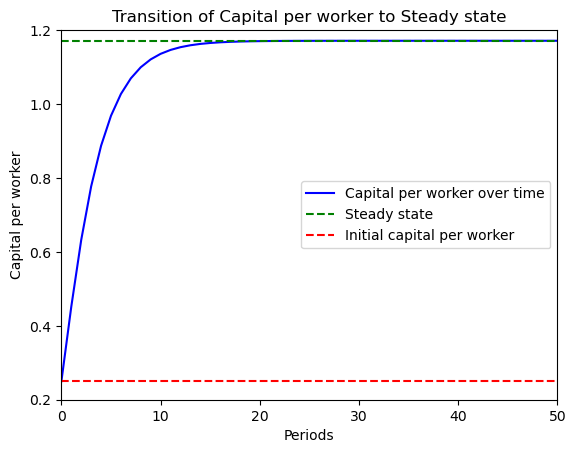

In [79]:
k = np.zeros(51)
k[0] = k_0 

for t in range(50):
    k[t + 1] = s*A*k[t]**alpha+(1-delta-n)*k[t]

#plot
plt.plot(range(51), k, label = "Capital per worker over time", color ="blue")
plt.axhline(y=k_star, color='green', linestyle='--', label='Steady state')
plt.axhline(y=k_0, color='red', linestyle='--', label='Initial capital per worker')

# Adding labels and title
plt.xlabel("Periods")
plt.ylabel("Capital per worker")
plt.title("Transition of Capital per worker to Steady state")
plt.legend()


#### Interpretation of the results:
- Economies with low initial capital can experience rapid growth initially, driven by the sharp rise in capital per worker during the initial periods indicates rapid capital accumulation. So economies that begin with low capital per worker, if they have a high savings rate, can initially grow very quickly as they catch up by accumulating capital.
- As capital per worker increases, the rate of growth slows down, and the curve flattens, highlighting that capital alone can't sustain high growth indefinitely.

#### TASK 2

Since the savings rate has increased from $𝑠=0.5$ to  $𝑠=0.6$, we can use the steady-state formula to calculate the new steady-state level of capital per worker:

\begin{align}
k^* = \left( \frac{s \cdot A}{\delta + n} \right)^{\frac{1}{1 - \alpha}}
\end{align}


In [44]:
#Prepare variables
s_new = 0.6 #new saving rate

In [59]:
#Calculate the initial steady-state level of capital per worker with s = 0.5:

k2 = (s2*A/(delta+n))**(1/(1-alpha))
k2 = round(k2, 4) # round to 4 decimal places
print("%.4f" % k2)


1.5396


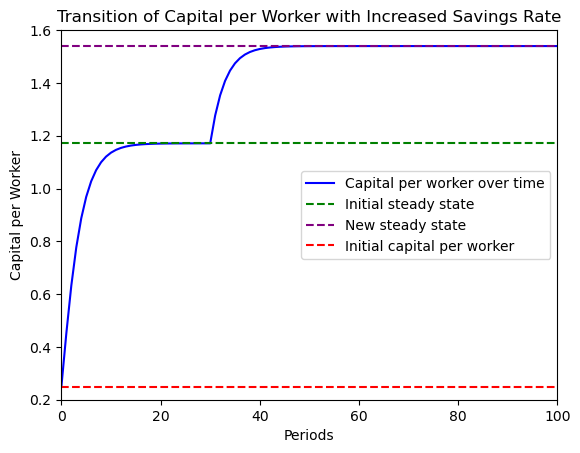

In [61]:
#Perform simulation of capital per worker over time
k2 = k
k2 = np.append(k2, np.zeros(50)) 

for t in range(30, 100):
    k2[t + 1] = s2*A*k2[t]**alpha+(1-delta-n)*k2[t]
    
#Plotting
plt.plot(range(101), k2, label = "Capital per worker over time",color="blue")
plt.axhline(y=k_star, color='green', linestyle='--', label='Initial steady state')
plt.axhline(y=k_star2, color='purple', linestyle='--', label='New steady state')
plt.axhline(y=k_0, color='red', linestyle='--', label='Initial capital per worker')

# Adding labels and title
plt.xlabel("Periods")
plt.ylabel("Capital per Worker")
plt.title("Transition of Capital per Worker with Increased Savings Rate")
plt.legend()
plt.show()


#### INTERPRETATION OF THE RESULTS FROM TASK 2

**Did the steady state level increase or decrease?**

- After increasing the savings rate from $𝑠 =0.5$ to  $𝑠=0.6$ the new steady-state level of capital per worker 
$k^*$ increased, which can be observed from the graph that the purple dashed line representing a higher steady-state level than the initial green dashed line.

**Why did the steady state level change?**

- Based on Solow model, the steady-state level of capital per worker depends positively on the savings rate. With high saving / investment rate $s$ and technology level $\bar{A}$ will have higher levels of steady state capital and output per worker. An increase in saving rates temporarily increases the growth rate of GDP per worker.

**What is the economic intuition behind the change in steady-state level of capital per worker after an increase in saving rate?**

- The economic intuition behind the increase in the steady-state capital per worker is
that a higher saving rate means more resources are allocated to investment, which
boosts the capital accumulation process, leading to a higher steady-state capital level. A higher steady-state capital per worker generally translates to higher output per worker, meaning that, in the long term, the population can enjoy a higher standard of living.

#### TASK 3

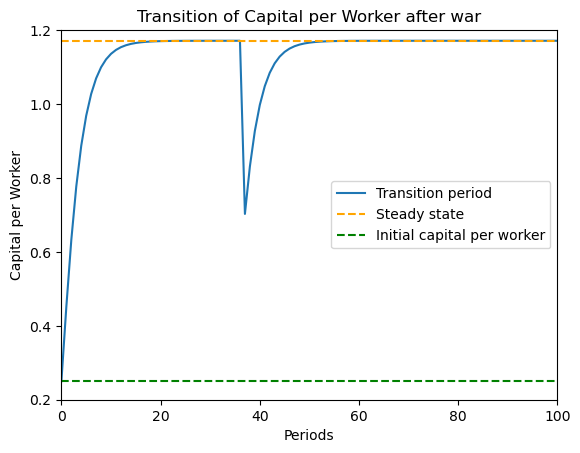

In [74]:
# Calculate the initial steady-state level of capital per worker
k3 = k # Assuming `k` is the initial steady-state capital from Task 1
k3 = np.append(k3, np.zeros(50)) #
war_happened = False
for t in range(100):
    # Check if 10 periods have passed and we are near steady state to apply war impact
    if t >= 10 and not war_happened and abs(k3[t - 10] - k_star) <= 0.0001:
        k3[t] *= 0.6  # Reduce capital by 40% after war
        war_happened = True

    # Simulate capital accumulation over time
    k3[t + 1] = s * A * k3[t]**alpha + (1 - delta - n) * k3[t]
    
#plotting
plt.plot(range(101), k3, label = "Transition period")
plt.axhline(y=k_star, color='orange', linestyle='--', label='Steady state')
plt.axhline(y=k_0, color='green', linestyle='--', label='Initial capital per worker')
plt.xlabel("Periods")
plt.ylabel("Capital per Worker")
plt.title("Transition of Capital per Worker after war")
plt.legend()
plt.show()

#### INTERPRETATION OF THE RESULTS FROM TASK 3

**Did it increase or decrease or not change?**

- The steady-state level of capital per worker **did not change** after the war. It remains the same as calculated in Task 1. 

**Why or why not?**


Because the Solow model suggests that economies have a natural tendency to return
to their steady state if their fundamental parameters remain constant (such as the saving
rate, depreciation rate,population growth rate and technology). After the shock, the lower
level of capital per worker temporarily boosts the return on capital, which drives
investment and helps rebuild capital back to its steady state (Resilience). In short, short-term shocks to capital do not permanently alter the steady-state equilibrium.

### PART C: REPLICATION OF MRW USING PWT 10.0


#### TASK 1

Run an unrestricted estimation on the replication dataset of the human capital augmented Solow model,
with `y_17` as the dependent variable and `s`, `δ_n_g` and `s_h` as independent variables.
Comment on the coefficient signs and explanatory power of the model.


#### Construct replication dataset

In [80]:
pwt = pd.read_stata('data/pwt100.dta')
pwt.set_index(['country', 'year'], inplace=True)


In [81]:
mrw = pd.read_stata('data/MRW1992.dta')
mrw_countries = mrw['country']
mrw.head()

,country,N,I,O,Y60,Y85,Y_growth,pop_growth,invest,school
0,Algeria,1,1,0,2485.0,4371.0,4.8,2.6,24.100000,4.5
1,Angola,1,0,0,1588.0,1171.0,0.8,2.1,5.800000,1.8
2,Benin,1,0,0,1116.0,1071.0,2.2,2.4,10.800000,1.8
3,Botswana,1,1,0,959.0,3671.0,8.6,3.2,28.299999,2.9
4,Burkina Faso,1,0,0,529.0,857.0,2.9,0.9,12.700000,0.4


In [82]:
not_found = []

for i, country in enumerate(mrw_countries[mrw['N']==1]):
    try:
        temp = np.log(np.mean(pwt.loc[country]['csh_i']))
    except:
        not_found.append(country)

print(not_found)

['CentralAfr. Rep.', 'Congo, Peop. Rep.', 'Ivory Cost', 'Somalia', 'S. Africa', 'Tanzania', 'Zaire', 'Burma', 'Hong Kong', 'Korea, Rep. of', 'Syrian Arab Rep.', 'Germany, Fed. Rep.', 'Dominican Rep.', 'Trinidad & Tobago', 'Bolivia', 'Venezuela', 'Papua New Guinea']


In [83]:
not_found_PWT = ['Central African Republic', 'Congo', "Côte d'Ivoire", 
                 'South Africa', 'U.R. of Tanzania: Mainland', 
                 'D.R. of the Congo', 'Myanmar', 'China, Hong Kong SAR', 
                 'Republic of Korea', 'Syrian Arab Republic', 'Germany', 
                 'Dominican Republic', 'Trinidad and Tobago', 
                 'Bolivia (Plurinational State of)', 'Venezuela (Bolivarian Republic of)']

In [84]:
mrw_pwt_countries = [n for n in mrw_countries[mrw['N']==1].tolist() if n not in not_found]
mrw_pwt_countries = mrw_pwt_countries + not_found_PWT

In [85]:
# Construct replication dataset based on observations for years 1985-2017
s = np.zeros(len(mrw_pwt_countries))
n = np.zeros(len(mrw_pwt_countries))
h = np.zeros(len(mrw_pwt_countries))
y_85 = np.zeros(len(mrw_pwt_countries))
y_17 = np.zeros(len(mrw_pwt_countries))

In [86]:
for i, country in enumerate(mrw_pwt_countries):
    s[i] = np.log(np.mean(pwt.loc[country]['csh_i'][35:]))
    n[i] = np.log(0.05+np.mean(pwt.loc[country]['emp'][35:].pct_change()))
    h[i] = np.mean(pwt.loc[country]['hc'][35:])
    y_85[i] = np.log(pwt.loc[country, 1985]['rgdpo']/pwt.loc[country, 1985]['emp'])
    y_17[i] = np.log(pwt.loc[country, 2017]['rgdpo']/pwt.loc[country, 2017]['emp'])


In [87]:
d = {'y_17': y_17, 'y_85': y_85, 's': s, 'δ_n_g': n, 's_h': np.log(np.log(h)*10)}
mrw_rep = pd.DataFrame(data=d, index=mrw_pwt_countries)
mrw_rep['y_17_85'] = mrw_rep['y_17'] - mrw_rep['y_85']
mrw_rep.head()

,y_17,y_85,s,δ_n_g,s_h,y_17_85
Algeria,10.673525,11.235086,-1.145871,-2.514745,1.838571,-0.561562
Angola,9.602782,8.652294,-1.065619,-2.503920,0.974068,0.950488
Benin,9.050662,8.656473,-1.878282,-2.508623,1.342471,0.394189
Botswana,10.601112,9.596834,-1.302101,-2.517723,2.186768,1.004278
Burkina Faso,8.637341,7.842568,-1.847810,-2.640430,0.072916,0.794774


#### Conduct OLS regression

In [88]:
#running OLS regression
mrw_results = smf.ols('y_17 ~ s + δ_n_g + s_h', data=mrw_rep).fit()
print(mrw_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   y_17   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     71.61
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           7.21e-24
Time:                        20:23:05   Log-Likelihood:                -95.617
No. Observations:                  95   AIC:                             199.2
Df Residuals:                      91   BIC:                             209.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2195      1.539      2.743      0.0

#### Interpretation of the coefficients:
All coefficients are statistically significant. R-squared shows that 70% of variation in dependent variable can be described through this model. 

The coefficient represents the effect of $s$ on y_17, which equals to 0.9181, meaning that with 1% change in saving per capita, GDP per capita goes up by 0.9181%.

Coefficient of sum of **depreciation, population growth rate and technology growth rate** is negative and equal to -1.92. With 1% growth in this variable, 
GDP per capita goes down by 1.92%. Coefficient of years of schooling is 1.1928. 

With 1% growth in years of **schooling**, GDP per capita goes up by 1.1928%. The signs of the coefficients we obtained are in line with Solow-Swan model, as higher savings typically increase capital accumulation, which in turn boosts economic output.

#### TASK 2

Run a restricted estimation on the replication dataset of the human capital augmented Solow model,
with `y_17` as the dependent variable, and appropriate restrictions as independent variables.
Comment on the implied values of $\alpha$ and $\beta$.

In [89]:
#construct variables for restricted model
mrw_rep['restricted'] = mrw_rep['s'] - mrw_rep['δ_n_g']

In [90]:
mrw_rep['restricted_h'] = mrw_rep['s_h'] - mrw_rep['δ_n_g']

In [91]:
#running restricted regression
print('\t Restricted regression')
mrw_h_results_restricted = smf.ols('y_17 ~ restricted + restricted_h', data=mrw_rep).fit()
print(mrw_h_results_restricted.summary())

α_β = ((mrw_h_results_restricted.params[1]+mrw_h_results_restricted.params[2])/
       (1+mrw_h_results_restricted.params[1]+mrw_h_results_restricted.params[2]))

print('')
print('Implied α =', mrw_h_results_restricted.params[1] * (1-α_β))
print('Implied β =', mrw_h_results_restricted.params[2] * (1-α_β))


	 Restricted regression
                            OLS Regression Results                            
Dep. Variable:                   y_17   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     108.5
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           6.34e-25
Time:                        20:23:05   Log-Likelihood:                -95.658
No. Observations:                  95   AIC:                             197.3
Df Residuals:                      92   BIC:                             205.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8147 

#### Interpretation of the results from Task 2:
The coefficients are statistically significant and R-squared shows that approximataly 70% of variation in dependent variable can be explained through the estimated model.


- The implied $𝛼$ value of 0.2924 suggests that capital contributes about 1/3 to output, which lies in the range of plausible values. 
- The implied $𝛽$ value of 0.3823 indicates that human capital contributes approximately 38.23% to output. This relatively high number highlights human capital's importance in explaining cross-country production differences.